### MEMO_0804 (v0804_1.0)

### _* Memo_0804_2_

In [46]:
from datetime import datetime


def get_candidated(version: str):
    """ get_candidated """
    query = f'select n0, n1, n2, n3, n4, n5 from candidated where version=\\"{version}\\";'
    metrics = !echo "{query}" | sqlite3 ../db/metrics.db
    if len(metrics) == 1:
        metrics = metrics[0].split('|')
        if len(metrics) == 6:
            return {0: int(metrics[0]),
                    1: int(metrics[1]),
                    2: int(metrics[2]),
                    3: int(metrics[3]),
                    4: int(metrics[4]),
                    5: int(metrics[5])}
    return {}


def update_candidated(candidated: dict, version: str):
    """ update_candidated """
    sel_query = f'select * from candidated where version=\\"{version}\\";'
    metrics = !echo "{sel_query}" | sqlite3 ../db/metrics.db
    if len(metrics) == 1:
        """ update """
        update_query = 'update candidated set '
        set_kv = []
        for key in candidated.keys():
            set_kv.append(f'n{key}={candidated[key]}')
        update_query += ", ".join(set_kv)
        update_query += f' where version=\\"{version}\\";'
        !echo "{update_query}" | sqlite3 ../db/metrics.db
        !echo "commit" | sqlite3 ../db/metrics.db
    else:
        """ insert """
        insert_query = 'insert into candidated ('
        new_key = []
        new_val = []
        for key in candidated.keys():
            new_key.append(f'n{key}')
            new_val.append(f'{candidated[key]}')
        new_key.append('version')
        new_val.append(f'\\"{version}\\"')
        insert_query += f'{", ".join(new_key)} ) values ('
        insert_query += f'{", ".join(new_val)} );'
        !echo "{insert_query}" | sqlite3 ../db/metrics.db
        !echo "commit" | sqlite3 ../db/metrics.db


def create_candidated():
    """ create_candidated """
    new_query = 'create table candidated ( ' \
                ' id INTEGER PRIMARY KEY AUTOINCREMENT, ' \
                ' version char[14], ' \
                ' n0 int, ' \
                ' n1 int, ' \
                ' n2 int, ' \
                ' n3 int, ' \
                ' n4 int, ' \
                ' n5 int );'
    !echo "{new_query}" | sqlite3 ../db/metrics.db
    !echo "commit" | sqlite3 ../db/metrics.db


# create_candidated()
print(f'code defined {datetime.now()}')

code defined 2025-08-05 18:15:24.700940


In [47]:
version="memo_0804_2"
candidate = get_candidated(version=version)
if len(candidate.keys()) == 0:
    candidate = {0:1, 1:13, 2:21, 3:25, 4:28, 5:31}
next_round = 1183
print('candidate = ', candidate)


candidate =  {0: 1, 1: 13, 2: 21, 3: 25, 4: 28, 5: 31}


In [48]:
## this code was run.
#!pip install keras-tuner
# import numpy as np
# import pandas as pd
import os
from datetime import datetime
from tqdm import tqdm
# print(f'Current Step #01 [now = {datetime.now()}')
from IPython.display import Markdown

from lib.analy_util import ( draw_markdown,
                             draw_graph,
                             draw_scatter,
                             get_pre_bef,
                             draw_average,
                             get_frequency,
                             get_information,
                             analyze_v1,
                             data_prepare,
                             search_model,
                             get_information_v2,
                             get_extdatas,
                             )
print(f'define this code. [{datetime.now()}]')


title = "Metrics"
row_length = 400
new_to_old = True
show_mark_down = True
markdown_table_limit_length = 20

define this code. [2025-08-05 18:15:26.970122]


In [49]:
query = 'select round, metric, bonus from results'
query += f' order by round desc '
query += f'limit 1'
rows = !echo "{query}"| sqlite3 ../db/metrics.db
cols = rows[0].split('|')
latest_nums = [int(i) for i in cols[1].split(',')]

print('latest_nums = ', latest_nums)

latest_nums =  [4, 15, 17, 23, 27, 36]


In [50]:
# Display the variable's value in Markdown
contents = f"###### Updated {datetime.now()}\n\n### {title}\n"
query = 'select round, metric, bonus from results'
query += f' order by round {"desc" if new_to_old else "asc"}'
limit_str = f'limit {row_length}'
query += f' {limit_str if row_length > 0 else ""}'
rows = !echo "{query}"| sqlite3 ../db/metrics.db
table_rows = ["|round|numbers|bonus|sum|0|10|20|30|40|",
              "|--|--|--|--|--|--|--|--|--|"
             ]
rows_dict = {1:[], 10:[], 20:[], 30:[], 40:[]}
nums_t = []
sums = []
cur_table_limit = 0
print(f'row\'s len = {len(rows)}')
candidate_strs = [f"{i}" for i in candidate.values()]
skip_first = True
for row in rows:
    if skip_first:
        row = f"{next_round}|{",".join(candidate_strs)}|0"
        skip_first = False
    cols = row.split('|')
    if len(cols) == 3:
        num_00 = 0
        num_10 = 0
        num_20 = 0
        num_30 = 0
        num_40 = 0
        nums_list = [int(i) for i in cols[1].split(',')]
        for num in nums_list:
            if num < 10:
                num_00 += 1
            if num >= 10 and num < 20:
                num_10 += 1
            if num >= 20 and num < 30:
                num_20 += 1
            if num >= 30 and num < 40:
                num_30 += 1
            if num >= 40 :
                num_40 += 1
        rows_dict[1].append(num_00)
        rows_dict[10].append(num_10)
        rows_dict[20].append(num_20)
        rows_dict[30].append(num_30)
        rows_dict[40].append(num_40)
        if cur_table_limit < markdown_table_limit_length:
            nums=[f"{i:02}" for i in nums_list] 
            table_rows.append(f"|{cols[0]}|{",".join(nums)}|{cols[2]}|{sum(nums_list)}|{num_00}|{num_10}|{num_20}|{num_30}|{num_40}|")
            cur_table_limit += 1
        nums_t.append(nums_list)
        sums.append(sum(nums_list))
sums.reverse()
table_rows_str = "\n".join(table_rows)
contents+=table_rows_str + "\n" + f"###### Updated {datetime.now()}"
Markdown(contents)

row's len = 400


###### Updated 2025-08-05 18:15:28.203010

### Metrics
|round|numbers|bonus|sum|0|10|20|30|40|
|--|--|--|--|--|--|--|--|--|
|1183|01,13,21,25,28,31|0|119|1|1|3|1|0|
|1183|04,15,17,23,27,36|31|122|1|2|2|1|0|
|1182|01,13,21,25,28,31|22|119|1|1|3|1|0|
|1181|08,10,14,20,33,41|28|126|1|2|1|1|1|
|1180|06,12,18,37,40,41|3|154|1|2|0|1|2|
|1179|03,16,18,24,40,44|21|145|1|2|1|0|2|
|1178|05,06,11,27,43,44|17|136|2|1|1|0|2|
|1177|03,07,15,16,19,43|21|103|2|3|0|0|1|
|1176|07,09,11,21,30,35|29|113|2|1|1|2|0|
|1175|03,04,06,08,32,42|31|95|4|0|0|1|1|
|1174|08,11,14,17,36,39|22|125|1|3|0|2|0|
|1173|01,05,18,20,30,35|3|109|2|1|1|2|0|
|1172|07,09,24,40,42,44|45|166|2|0|1|0|3|
|1171|03,06,07,11,12,17|19|56|3|3|0|0|0|
|1170|03,13,28,34,38,42|25|158|1|1|1|2|1|
|1169|05,12,24,26,39,42|20|148|1|1|2|1|1|
|1168|09,21,24,30,33,37|29|154|1|0|2|3|0|
|1167|08,23,31,35,39,40|24|176|1|0|1|3|1|
|1166|14,23,25,27,29,42|16|160|0|1|4|0|1|
|1165|06,07,27,29,38,45|17|152|2|0|2|1|1|
###### Updated 2025-08-05 18:15:28.215093

In [51]:
# 기준이 되는 수에 대한 DB의 기존 데이터를 출력합니다.
def get_likey(like_query, next_round):
    rows = !echo "{like_query}" | sqlite3 ../db/metrics.db
    cur_next_round = next_round
    if len(rows) > 0:
        for row in rows:
            cols = row.split("|")
            nums = [int(i) for i in cols[2].split(',')]
            nums_str = [f"{int(i): >2}" for i in nums]
            round_diff = 0
            cur_round = int(cols[1])        
            if next_round > 0:
                round_diff = cur_next_round - cur_round
            cur_next_round = cur_round
            print(f"{cur_round: >4} | {','.join(nums_str)} | {sum(nums): >3} | {round_diff: >3}")
    else:
        print('data is empty.')

In [52]:
# 기준이 되는 수에 대한 DB의 기존 데이터를 출력합니다.
like_query = 'select * from results where metric like \\"11,%,%,%,%,45\\" order by round desc;'
get_likey(like_query, next_round)

1118 | 11,13,14,15,16,45 | 114 |  65
 729 | 11,17,21,26,36,45 | 156 | 389
 711 | 11,15,24,35,37,45 | 167 |  18


In [53]:
"""
data preparation
"""

#########
# nums_t
nums_by_row = [[] for i in range(6)]
for nums in nums_t:
    for i in range(6):
        nums_by_row[i].append(nums[i])
for i in range(6):
    nums_by_row[i].reverse()

##########
# row_list
row_list = []
row_list_none_last = []
for nums in nums_by_row:
    row_list.append(nums[0:-1])
    row_list_none_last.append(nums[0: len(nums)-1])

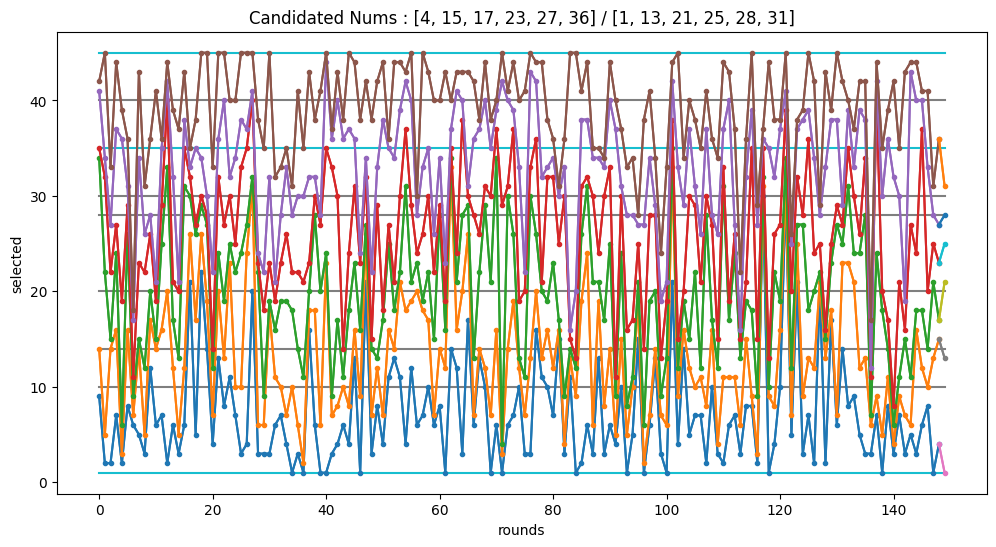

In [54]:
ext_datas = []

for key in candidate:
    ext_datas.append((key, candidate[key]))

# show_cols = [0, 1, 2, 3, 4, 5]
show_cols = [0, 1, 2, 3, 4, 5]
show_label = False
show_cnt = 150

start_pos = row_length - show_cnt

show_data = []
for i in range(6):
    show_data.append(row_list[i][start_pos:])

draw_scatter(Y=show_data,
             title=f'Candidated Nums : {latest_nums} / {list(candidate.values())}',
             show_line=True,
             show_dot=True,
             show_cols=show_cols,
             ext_datas=ext_datas,
             show_label=show_label,
             helper_line_nums=[1, 10, 14, 20, 28, 30, 35, 40, 45],
             marker_size=3,
             fig_size=(12,6),
             save_fig=False,
             show_time=False
            )


In [55]:
[1, 14, 28, 35, 38, 45]

[1, 14, 28, 35, 38, 45]

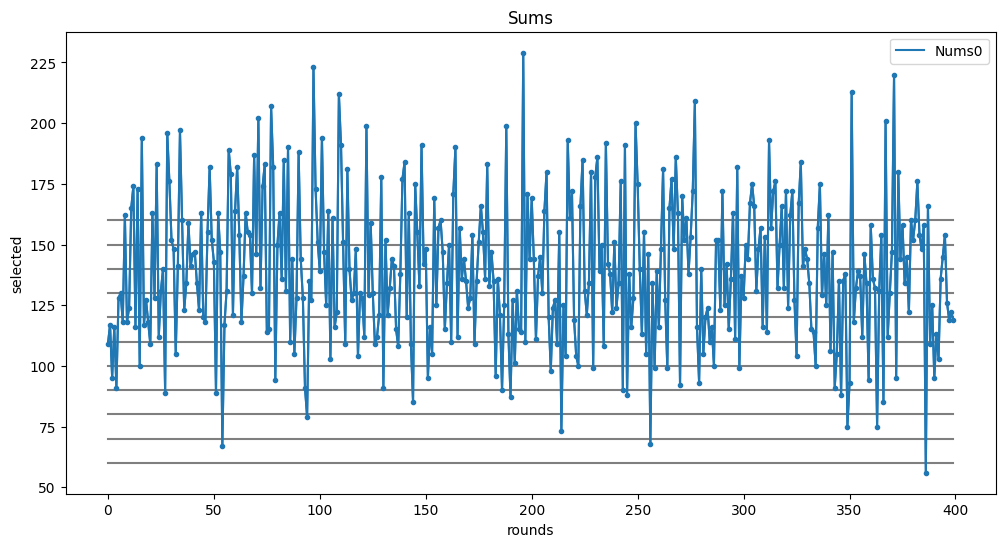

candidate =  119
candidate =  dict_values([1, 13, 21, 25, 28, 31])
last      =  [109, 117, 95, 116, 91, 128, 130, 118, 162, 118, 124, 165, 174, 116, 173, 100, 194, 117, 127, 118, 109, 163, 128, 183, 112, 131, 140, 89, 196, 176, 152, 148, 105, 141, 197, 160, 123, 134, 159, 141, 146, 147, 134, 123, 163, 120, 118, 155, 182, 152, 143, 89, 163, 147, 67, 117, 131, 189, 179, 121, 164, 182, 154, 118, 137, 163, 155, 154, 130, 187, 146, 202, 132, 174, 183, 114, 115, 207, 182, 94, 150, 163, 136, 185, 131, 190, 110, 144, 105, 128, 188, 144, 128, 91, 79, 135, 127, 223, 173, 151, 139, 194, 147, 125, 164, 103, 161, 116, 122, 212, 191, 151, 109, 181, 140, 127, 130, 148, 104, 130, 128, 112, 199, 129, 159, 130, 109, 112, 121, 178, 91, 152, 121, 132, 144, 141, 115, 108, 138, 177, 184, 120, 163, 109, 85, 175, 155, 133, 191, 142, 148, 95, 116, 105, 169, 125, 157, 160, 147, 115, 134, 150, 110, 171, 190, 112, 157, 136, 144, 135, 124, 128, 154, 109, 135, 151, 166, 155, 136, 183, 133, 147, 135, 96, 136, 121, 9

In [56]:
s1 = sums[:-1] + [sum(candidate.values())]
draw_scatter([s1], f'Sums', helper_line_nums=[60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160])
print('candidate = ', sum(candidate.values()))
print('candidate = ', candidate.values())
print('last      = ', sums[:-1])

before   = 0
ext_data = 3
after    = 13


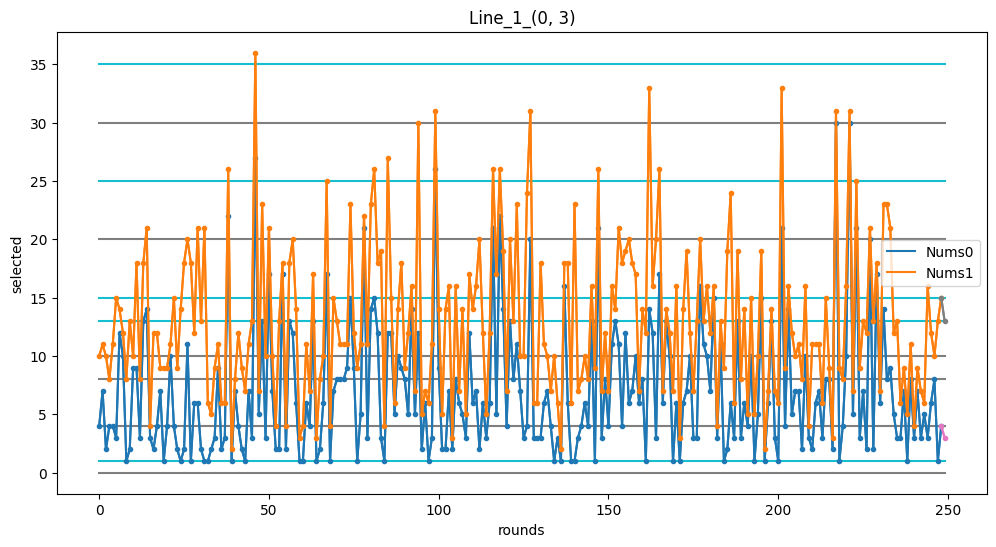

최소 값         = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 30]
최대 값         = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 30]
사용자 선택       = 3
마지막 값        = 4
마지막 값들       = [4, 10, 30, 5, 21, 3, 7, 2, 20, 2, 17, 6, 14, 8, 9, 5, 3, 3, 7, 1, 8, 3, 7, 3, 5, 3, 6, 8, 1, 4]
자주 나오는 값(부분) = [(22, 1), (9, 2), (20, 2), (16, 2), (17, 2), (15, 2), (30, 2), (12, 3), (21, 4), (14, 4), (11, 5), (13, 6), (5, 7), (10, 7), (8, 9), (2, 10), (4, 11), (7, 13), (1, 15), (6, 18), (3, 24)]
자주 나오는 값(전체) = [(23, 1), (27, 1), (26, 1), (18, 2), (22, 2), (30, 2), (20, 3), (19, 4), (15, 5), (17, 7), (16, 7), (21, 7), (11, 9), (14, 13), (13, 13), (12, 16), (10, 16), (9, 16), (8, 20), (5, 27), (7, 27), (4, 28), (6, 32), (2, 43), (1, 47), (3, 50)]
마지막 수의 앞과 뒤 #1 = [[-1, 4, 12], [5, 4, 4], [4, 4, 5], [8, 4, 11], [7, 4, 18], [9, 4, 1], [9, 4, 1], [1, 4, 5], [10, 4, 3], [1, 4, 7], [2, 4, 4], [4, 4, 3], [2, 4, 7], [1, 4, 10], [10, 4, 2], [7, 4, 2], [6, 4, 13], [14

________________________________________
최소값          = [4.0, 4.2, 4.3, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1]
최대값          = [8.9, 9.0, 9.1, 9.2, 9.3, 9.6, 9.7, 10.0, 10.1, 10.2, 10.3, 10.4, 10.6, 10.7, 10.8, 11.1, 11.3, 11.4, 11.7, 11.9]
마지막          = [11.3, 9.7, 10.0, 8.8, 9.0, 8.6, 8.7, 7.4, 7.3, 6.4, 6.1, 5.4, 4.9, 4.5, 4.3, 4.6, 5.1, 4.5, 4.8, 4.3]


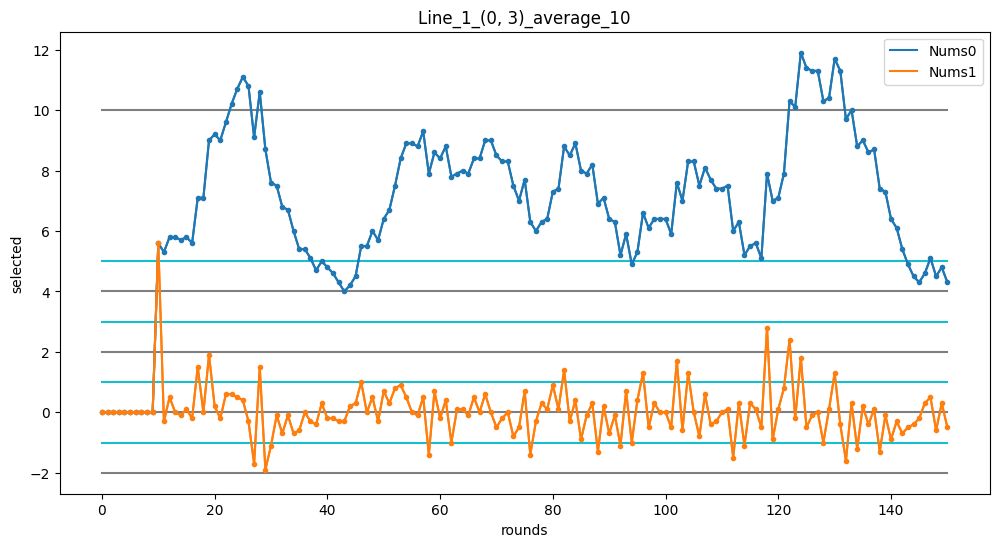

________________________________________
최소값          = [4.95, 5.1, 5.3, 5.35, 5.45, 5.55, 5.6, 5.65, 5.9, 5.95, 6.05, 6.1, 6.2, 6.4, 6.45, 6.55, 6.6, 6.65, 6.7, 6.75]
최대값          = [8.15, 8.2, 8.25, 8.35, 8.4, 8.45, 8.55, 8.6, 8.7, 8.8, 8.85, 9.05, 9.1, 9.4, 9.6, 9.95, 10.0, 10.05, 10.2, 10.35]
마지막          = [9.6, 10.0, 10.05, 10.35, 10.2, 9.95, 10.0, 8.85, 8.85, 9.05, 8.7, 7.55, 7.45, 6.65, 6.65, 6.6, 6.9, 5.95, 6.05, 5.35]


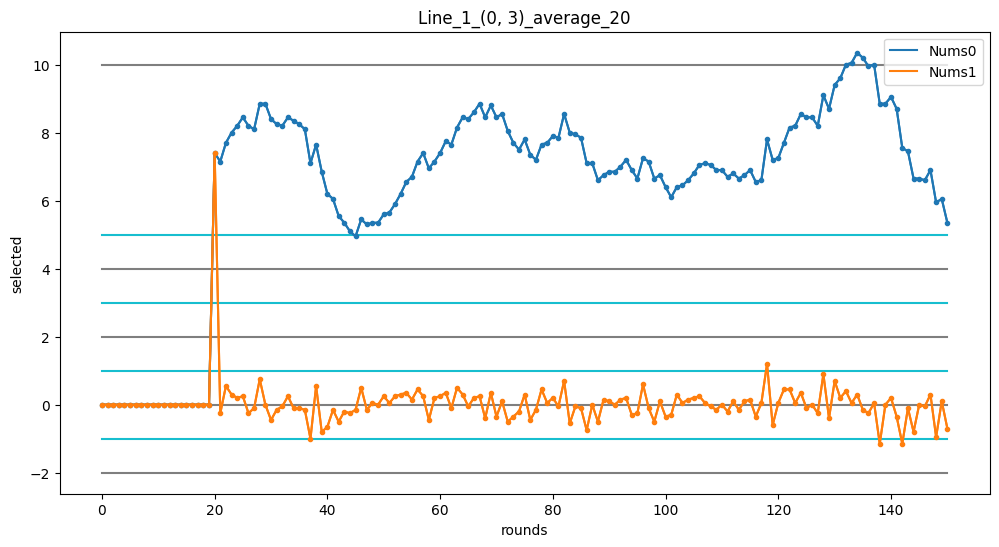

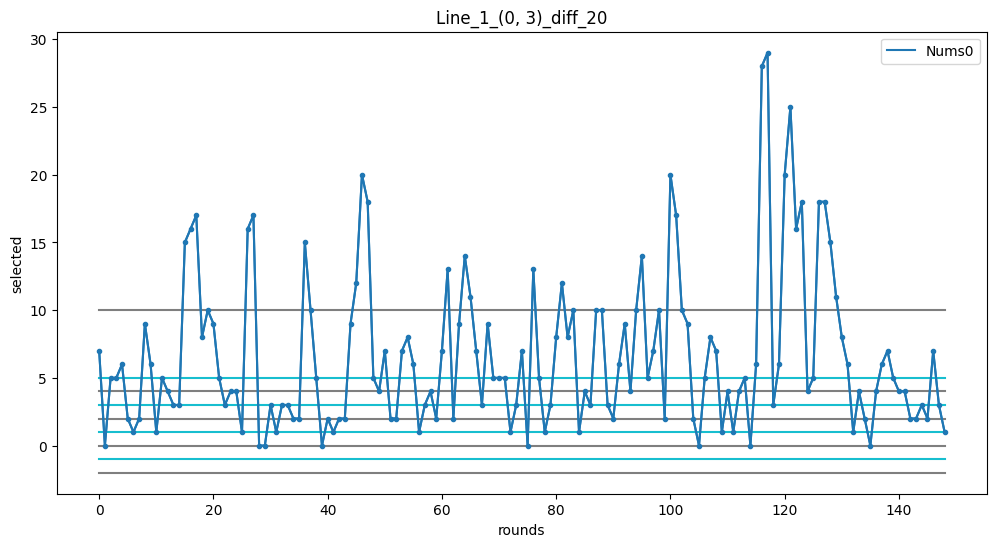

Runtime error near line 1: cannot commit - no transaction is active


In [57]:
Round = 1
############################
selected = Round - 1
ext_data = 3

before = 0
after = candidate[selected+1]

print(f"before   = {before}")
print(f"ext_data = {ext_data}")
print(f"after    = {after}")

wanted_data_length = 30
helper_line_nums_1 = [0, 1, 4, 8, 10, 13, 15, 20, 25, 30, 35]
# helper_line_nums_2 = [-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 7, 9, 11]
helper_line_nums_2 = [-2, -1, 0, 1, 2, 3, 4, 5, 10]
# lengths = [2, 5, 8, 10, 13, 15, 20, 25, 30]
lengths = [1, 10, 20]
start_pos_0 = 150
start_pos_1 = 250
num_data=row_list_none_last[selected]
show_after = True
show_before = False
show_average = True
min_max_last_num_length = 20
show_diff_nums = True

ext_datas = get_extdatas(show_before, show_after, before, ext_data, after)

get_information_v2(selected=selected,
                   last_results=row_list_none_last,
                   ext_datas=ext_datas,
                   wanted_data_length=wanted_data_length,
                   helper_line_nums_1=helper_line_nums_1,
                   helper_line_nums_2=helper_line_nums_2,
                   show_diff=True,
                   lengths=lengths,
                   start_pos_0=start_pos_0,
                   start_pos_1=start_pos_1,
                   show_after=show_after,
                   show_before=show_before,
                   show_average=show_average,
                   min_max_last_num_length=min_max_last_num_length,
                   show_diff_nums=show_diff_nums
                   )
candidate[selected] = ext_data
update_candidated(candidated={selected: ext_data}, version=version)

before   = 3
ext_data = 6
after    = 21


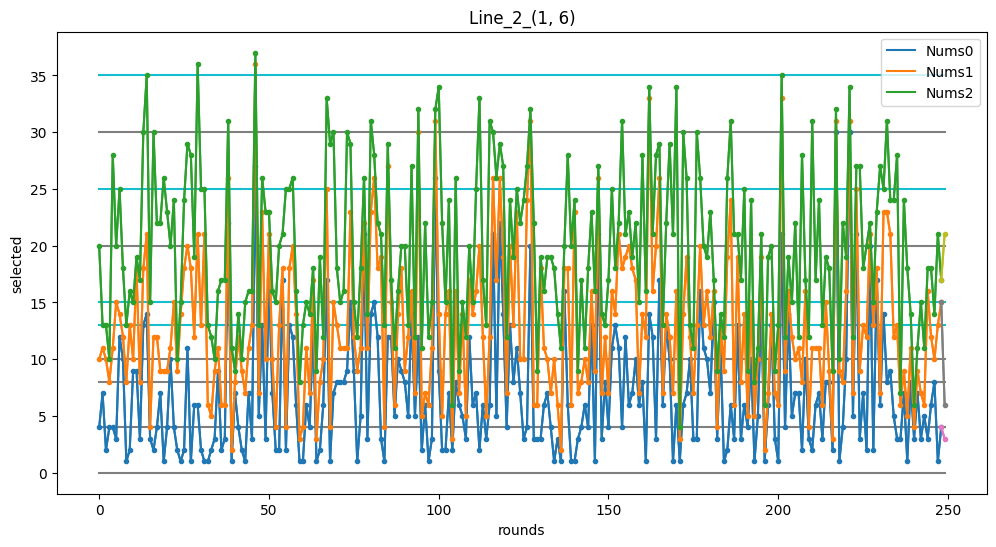

최소 값         = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 31, 33]
최대 값         = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 31, 33]
사용자 선택       = 6
마지막 값        = 15
마지막 값들       = [8, 16, 31, 7, 25, 9, 13, 12, 21, 13, 18, 7, 23, 23, 21, 12, 13, 6, 9, 5, 11, 4, 9, 7, 6, 16, 12, 10, 13, 15]
자주 나오는 값(부분) = [(25, 1), (24, 2), (2, 2), (33, 2), (3, 3), (17, 3), (31, 3), (21, 3), (4, 3), (15, 3), (26, 4), (23, 4), (20, 5), (8, 5), (5, 6), (19, 6), (18, 6), (11, 6), (13, 8), (10, 8), (9, 8), (6, 9), (14, 10), (12, 11), (16, 13), (7, 15)]
자주 나오는 값(전체) = [(30, 2), (34, 2), (33, 2), (27, 3), (22, 4), (2, 4), (31, 4), (24, 5), (25, 7), (26, 8), (23, 8), (20, 9), (3, 10), (19, 10), (17, 12), (5, 12), (8, 16), (4, 16), (21, 17), (13, 18), (15, 19), (16, 20), (14, 20), (12, 21), (9, 23), (18, 23), (10, 24), (6, 25), (11, 26), (7, 27)]
마지막 수의 앞과 뒤 #1 = [[6, 15, 6], [7, 15, 7], [9, 15, 25], [9, 15, 16], [25, 1

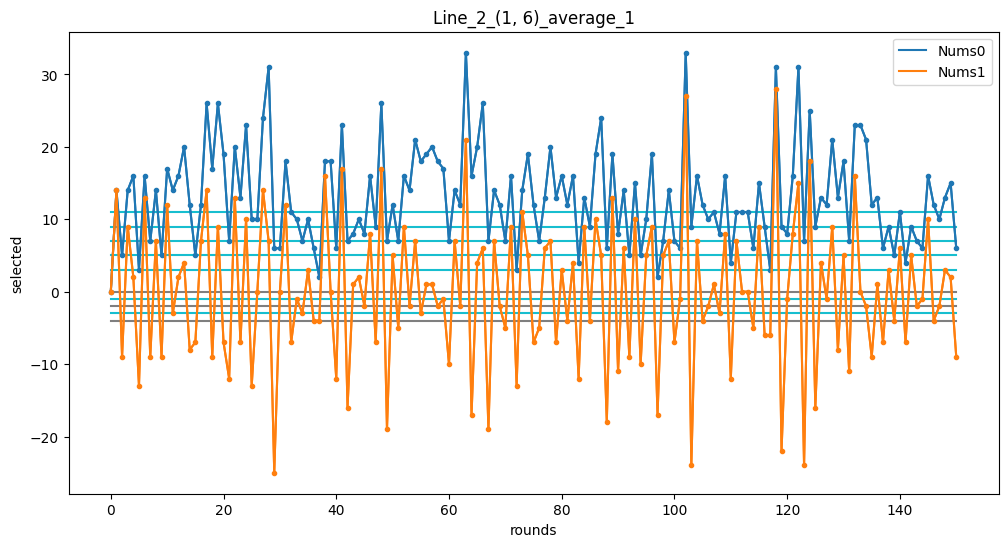

________________________________________
최소값          = [8.2, 8.5, 8.6, 8.9, 9.0, 9.3, 9.4, 9.7, 9.8, 9.9, 10.0, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 11.0, 11.1]
최대값          = [15.5, 15.6, 15.7, 16.0, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17.0, 17.1, 17.3, 17.4, 17.6, 17.9, 18.3]
마지막          = [15.6, 14.8, 16.4, 16.0, 16.3, 16.3, 15.7, 14.5, 13.7, 13.0, 12.7, 11.3, 9.7, 8.2, 8.6, 8.5, 8.9, 9.3, 10.3, 9.8]


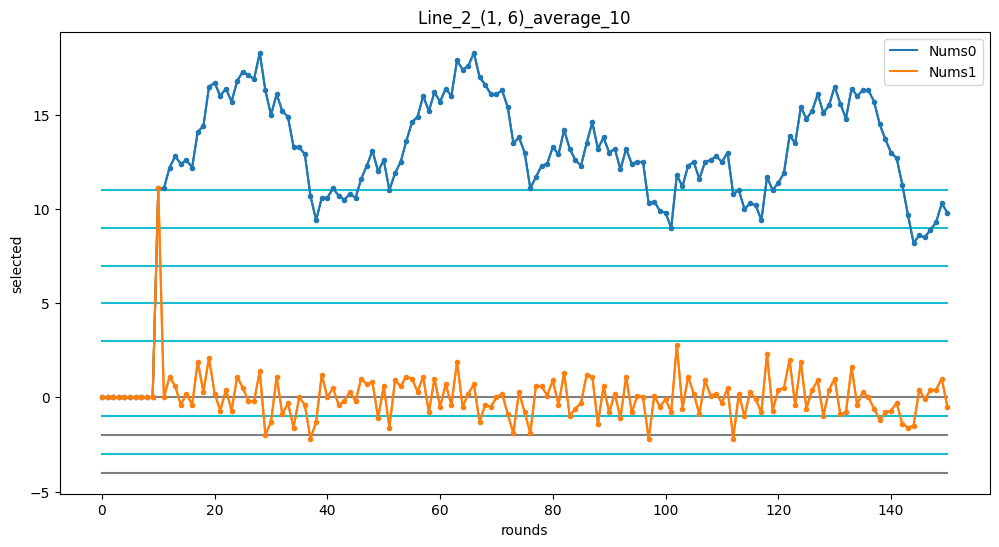

________________________________________
최소값          = [10.9, 10.95, 11.0, 11.05, 11.1, 11.15, 11.25, 11.3, 11.35, 11.4, 11.5, 11.6, 11.8, 11.85, 11.9, 11.95, 12.0, 12.05, 12.1, 12.15]
최대값          = [14.95, 15.0, 15.05, 15.2, 15.3, 15.5, 15.55, 15.6, 15.7, 15.75, 15.8, 15.85, 15.9, 16.05, 16.1, 16.15, 16.35, 16.4, 16.5, 16.6]
마지막          = [13.75, 14.35, 14.95, 15.7, 15.55, 15.75, 15.9, 14.8, 14.6, 14.75, 14.15, 13.05, 13.05, 12.1, 12.45, 12.4, 12.3, 11.9, 12.0, 11.4]


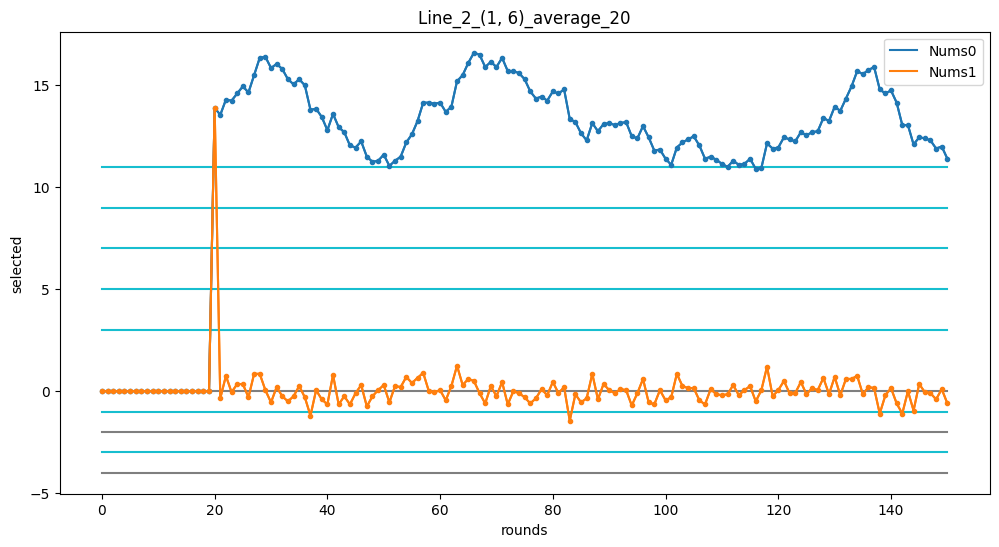

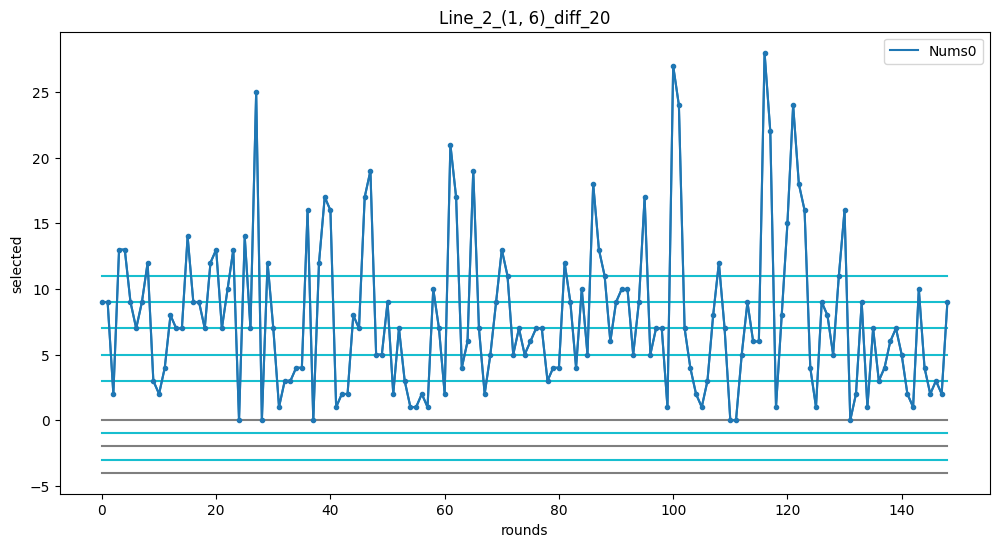

Runtime error near line 1: cannot commit - no transaction is active


In [58]:
Round = 2
############################
selected = Round - 1
ext_data = 6

before = candidate[selected-1]
after = candidate[selected+1]

print(f"before   = {before}")
print(f"ext_data = {ext_data}")
print(f"after    = {after}")

wanted_data_length = 30
helper_line_nums_1 = [0, 4, 8, 10, 13, 15, 20, 25, 30, 35]
# helper_line_nums_2 = [-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 7, 9, 11]
helper_line_nums_2 = [-4, -3, -2, -1, 0, 3, 5, 7, 9, 11]
# lengths = [2, 5, 8, 10, 13, 15, 20, 25, 30]
lengths = [1, 10, 20]
start_pos_0 = 150
start_pos_1 = 250
num_data=row_list_none_last[selected]
show_after = True
show_before = True
show_average = True
min_max_last_num_length = 20
show_diff_nums = True

ext_datas = get_extdatas(show_before, show_after, before, ext_data, after)

get_information_v2(selected=selected,
                   last_results=row_list_none_last,
                   ext_datas=ext_datas,
                   wanted_data_length=wanted_data_length,
                   helper_line_nums_1=helper_line_nums_1,
                   helper_line_nums_2=helper_line_nums_2,
                   show_diff=True,
                   lengths=lengths,
                   start_pos_0=start_pos_0,
                   start_pos_1=start_pos_1,
                   show_after=show_after,
                   show_before=show_before,
                   show_average=show_average,
                   min_max_last_num_length=min_max_last_num_length,
                   show_diff_nums=show_diff_nums
                   )
candidate[selected] = ext_data
update_candidated(candidated={selected: ext_data}, version=version)

before   = 6
ext_data = 14
after    = 25


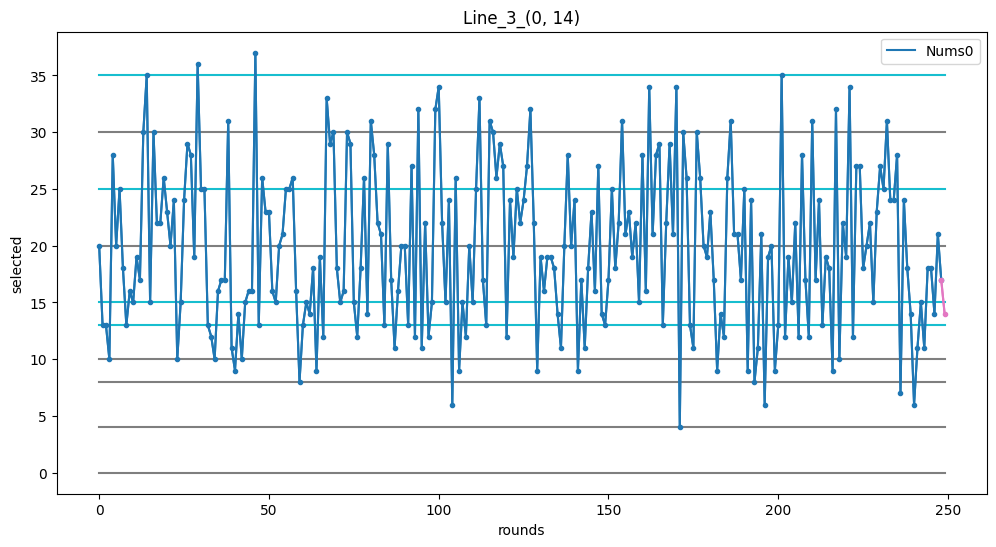

최소 값         = [4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
최대 값         = [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
사용자 선택       = 14
마지막 값        = 17
마지막 값들       = [22, 19, 34, 12, 27, 27, 18, 20, 22, 15, 23, 27, 25, 31, 24, 24, 28, 7, 24, 18, 14, 6, 11, 15, 11, 18, 18, 14, 21, 17]
자주 나오는 값(부분) = [(4, 1), (8, 1), (35, 1), (10, 1), (7, 1), (32, 2), (6, 3), (30, 3), (29, 3), (16, 3), (34, 4), (23, 4), (26, 5), (25, 5), (31, 5), (14, 5), (28, 5), (20, 6), (13, 6), (27, 6), (11, 6), (15, 7), (9, 7), (12, 7), (21, 7), (17, 8), (18, 8), (22, 9), (24, 9), (19, 10)]
자주 나오는 값(전체) = [(37, 2), (33, 3), (35, 3), (8, 3), (6, 3), (34, 6), (27, 7), (32, 8), (10, 9), (9, 9), (26, 12), (31, 12), (21, 13), (14, 13), (29, 13), (23, 14), (25, 14), (30, 14), (11, 15), (28, 17), (20, 17), (24, 17), (22, 18), (15, 19), (16, 20), (18, 20), (17, 20), (19, 22), (1

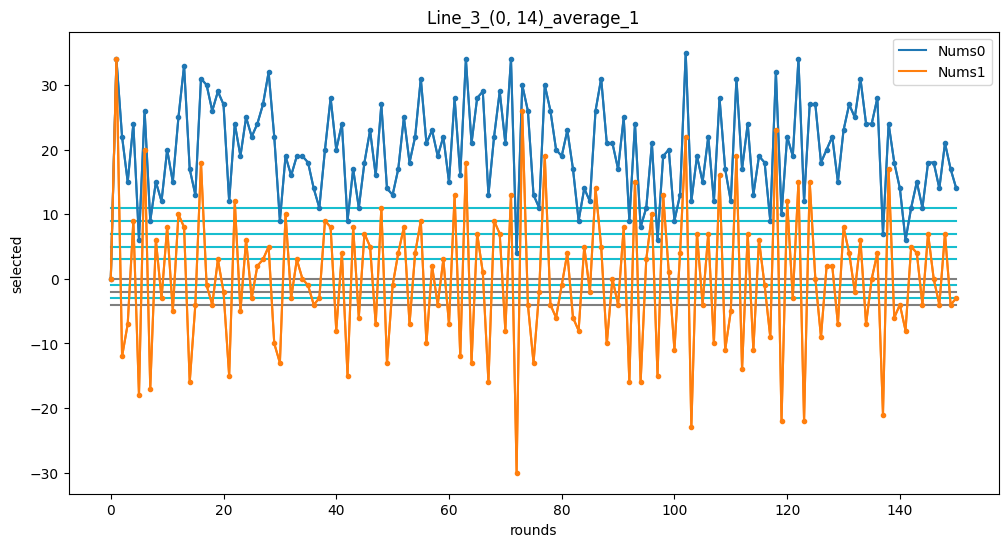

________________________________________
최소값          = [14.0, 14.2, 14.5, 14.6, 14.9, 15.2, 15.4, 15.8, 16.0, 16.1, 16.3, 16.4, 16.5, 16.6, 16.7, 16.9, 17.0, 17.1, 17.2, 17.3]
최대값          = [22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23.0, 23.1, 23.2, 23.4, 23.5, 23.6, 23.8, 23.9, 24.1, 24.2, 24.3, 24.5, 24.6, 24.7]
마지막          = [22.5, 21.6, 23.5, 23.2, 22.9, 23.9, 22.6, 22.8, 23.1, 22.2, 20.1, 18.7, 17.1, 15.8, 15.2, 14.2, 14.9, 14.6, 14.5, 14.5]


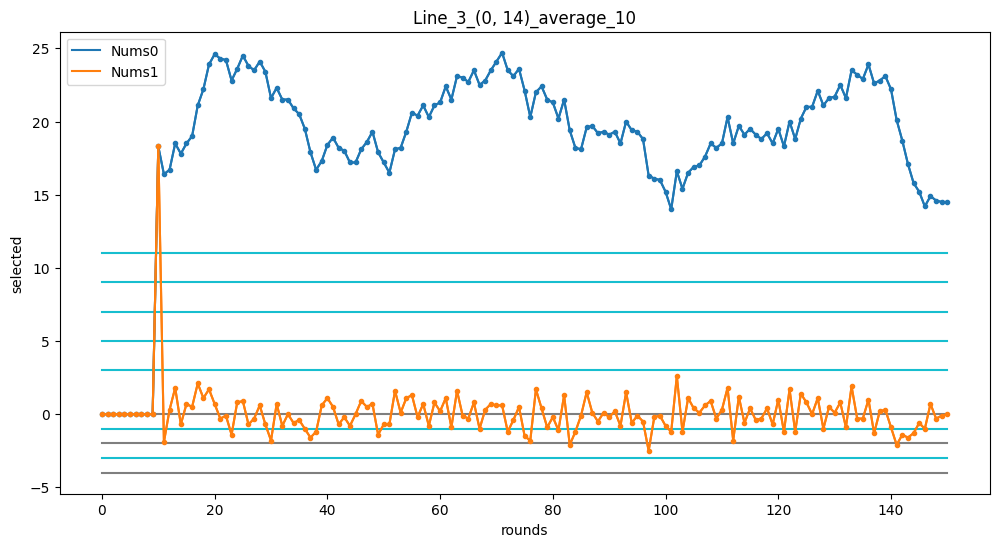

________________________________________
최소값          = [16.65, 16.85, 16.95, 17.1, 17.15, 17.3, 17.55, 17.6, 17.65, 17.7, 17.8, 17.9, 17.95, 18.0, 18.05, 18.1, 18.15, 18.2, 18.25, 18.35]
최대값          = [21.65, 21.7, 21.8, 21.9, 21.95, 22.15, 22.25, 22.3, 22.35, 22.4, 22.45, 22.5, 22.6, 22.7, 22.85, 23.1, 23.15, 23.3, 23.55, 23.65]
마지막          = [20.4, 20.8, 21.15, 21.7, 21.95, 22.45, 22.35, 21.95, 22.35, 21.95, 21.3, 20.15, 20.3, 19.5, 19.05, 19.05, 18.75, 18.7, 18.8, 18.35]


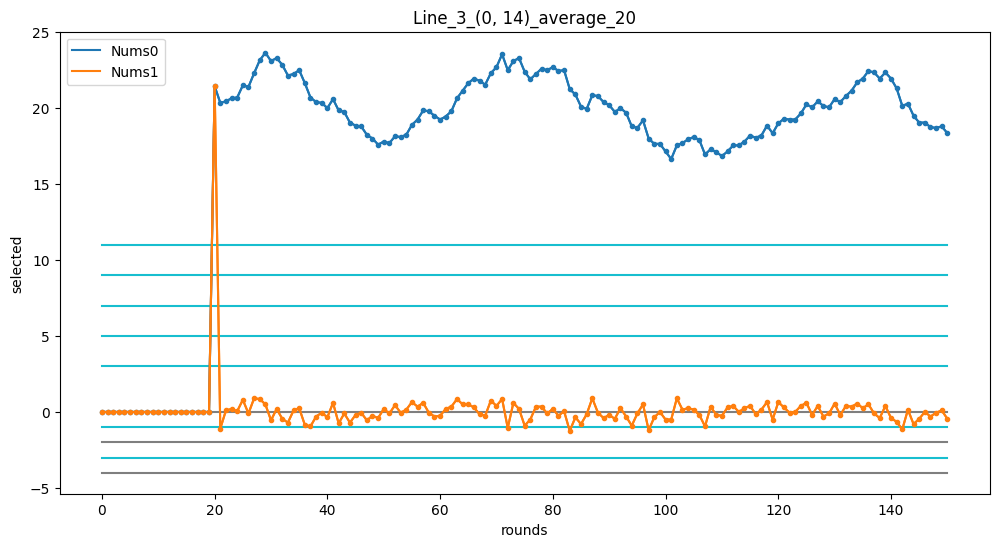

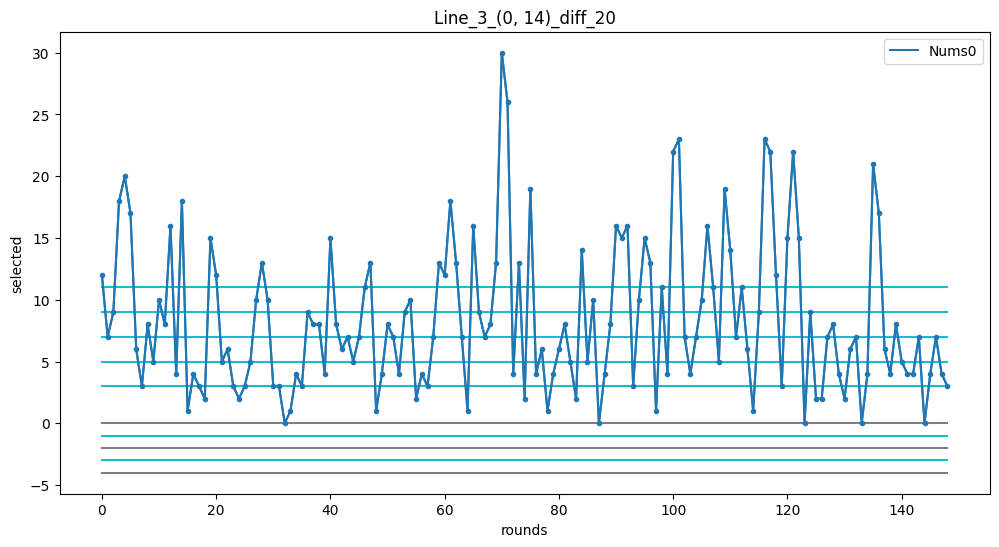

Runtime error near line 1: cannot commit - no transaction is active


In [59]:
Round = 3
############################
selected = Round - 1
ext_data = 14

before = candidate[selected-1]
after = candidate[selected+1]

print(f"before   = {before}")
print(f"ext_data = {ext_data}")
print(f"after    = {after}")

wanted_data_length = 30
helper_line_nums_1 = [0, 4, 8, 10, 13, 15, 20, 25, 30, 35]
# helper_line_nums_2 = [-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 7, 9, 11]
helper_line_nums_2 = [-4, -3, -2, -1, 0, 3, 5, 7, 9, 11]
# lengths = [2, 5, 8, 10, 13, 15, 20, 25, 30]
lengths = [1, 10, 20]
start_pos_0 = 150
start_pos_1 = 250
num_data=row_list_none_last[selected]
show_after = False
show_before = False
show_average = True
min_max_last_num_length = 20
show_diff_nums = True

ext_datas = get_extdatas(show_before, show_after, before, ext_data, after)

get_information_v2(selected=selected,
                   last_results=row_list_none_last,
                   ext_datas=ext_datas,
                   wanted_data_length=wanted_data_length,
                   helper_line_nums_1=helper_line_nums_1,
                   helper_line_nums_2=helper_line_nums_2,
                   show_diff=True,
                   lengths=lengths,
                   start_pos_0=start_pos_0,
                   start_pos_1=start_pos_1,
                   show_after=show_after,
                   show_before=show_before,
                   show_average=show_average,
                   min_max_last_num_length=min_max_last_num_length,
                   show_diff_nums=show_diff_nums
                   )
candidate[selected] = ext_data
update_candidated(candidated={selected: ext_data}, version=version)

before   = 14
ext_data = 23
after    = 28


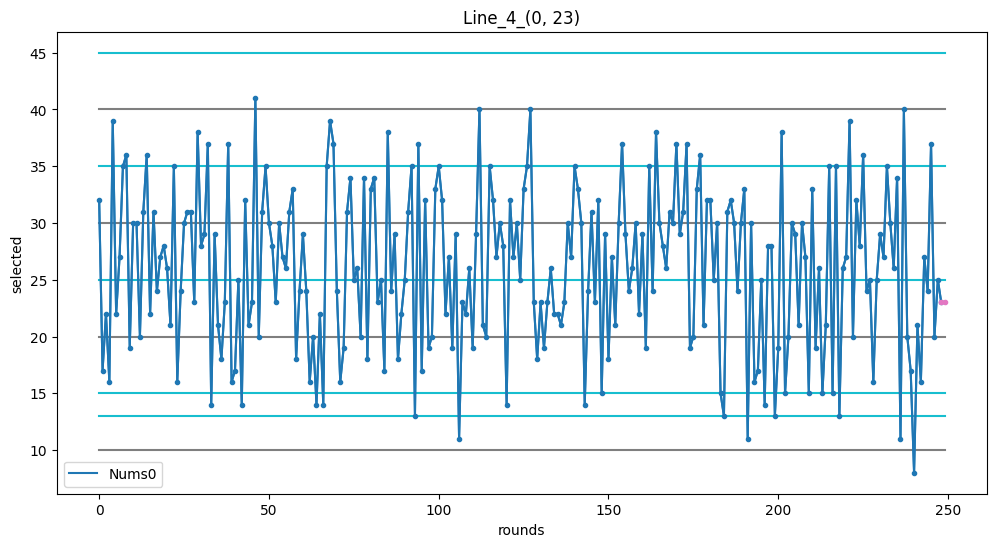

최소 값         = [8, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
최대 값         = [8, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
사용자 선택       = 23
마지막 값        = 23
마지막 값들       = [26, 27, 39, 20, 32, 28, 36, 24, 25, 16, 25, 29, 27, 35, 30, 26, 34, 11, 40, 20, 17, 8, 21, 16, 27, 24, 37, 20, 25, 23]
자주 나오는 값(부분) = [(39, 1), (34, 1), (8, 1), (18, 2), (38, 2), (36, 2), (17, 2), (11, 3), (40, 3), (14, 3), (13, 3), (16, 3), (31, 4), (37, 4), (22, 5), (28, 5), (33, 5), (20, 6), (25, 6), (24, 6), (15, 6), (19, 7), (23, 7), (26, 7), (21, 7), (35, 8), (32, 8), (29, 8), (27, 9), (30, 15)]
자주 나오는 값(전체) = [(11, 3), (39, 4), (41, 4), (40, 5), (36, 7), (34, 8), (17, 8), (13, 8), (15, 8), (16, 10), (37, 10), (14, 11), (18, 13), (38, 13), (20, 14), (19, 14), (33, 15), (25, 16), (28, 16), (24, 16), (22, 17), (21, 17), (29, 17), (23, 17), (27, 18), (32, 18), (31, 1

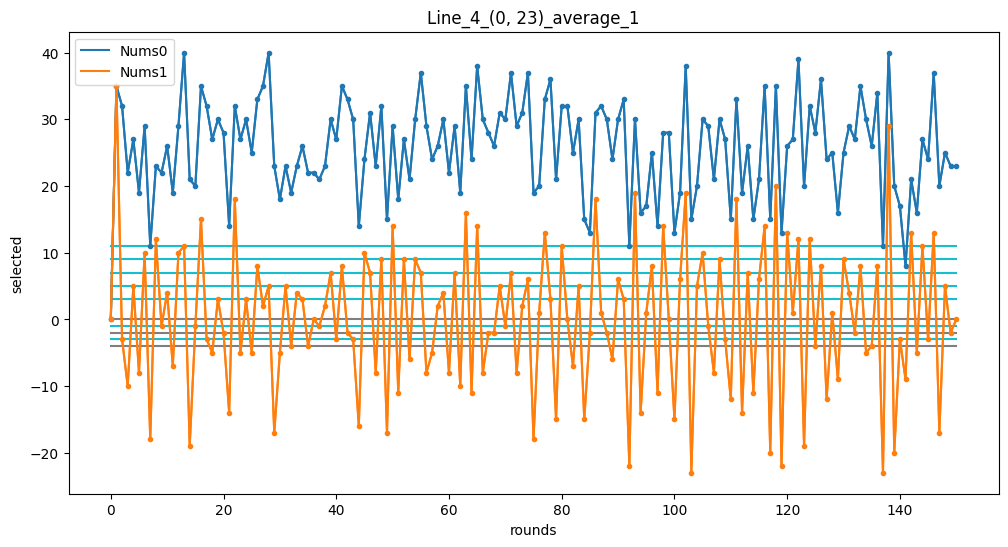

________________________________________
최소값          = [20.1, 21.3, 21.5, 21.7, 21.8, 22.0, 22.1, 22.3, 22.4, 22.7, 22.8, 23.0, 23.2, 23.4, 23.6, 23.7, 23.8, 23.9, 24.0, 24.1]
최대값          = [27.6, 27.7, 27.8, 27.9, 28.0, 28.1, 28.2, 28.5, 28.6, 28.7, 28.8, 29.0, 29.3, 29.4, 29.5, 29.8, 30.3, 30.4, 30.8, 31.7]
마지막          = [27.4, 26.2, 27.7, 27.5, 27.3, 27.1, 25.8, 27.3, 27.7, 26.9, 24.8, 24.2, 22.3, 22.0, 21.8, 22.1, 23.0, 21.5, 21.8, 22.4]


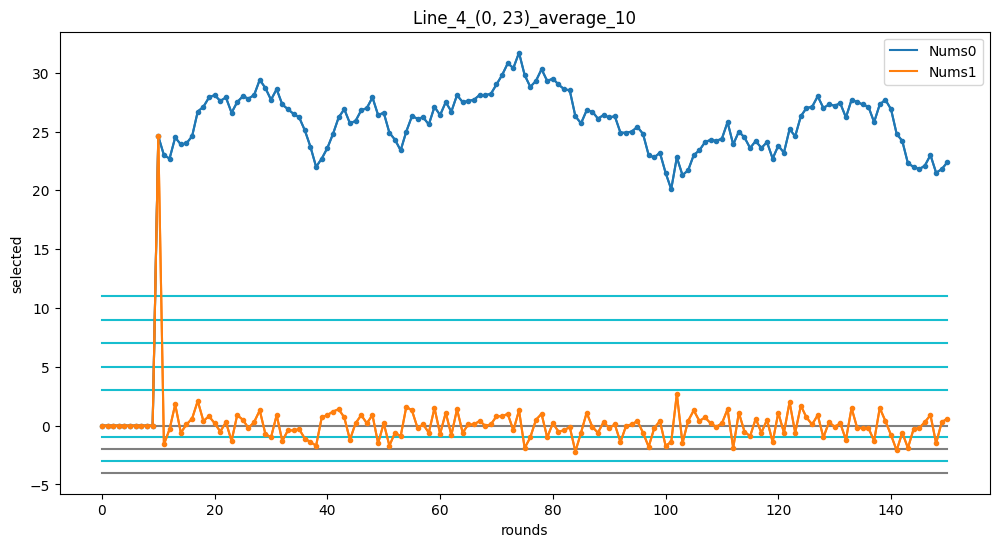

________________________________________
최소값          = [22.95, 23.1, 23.15, 23.2, 23.3, 23.35, 23.45, 23.55, 23.7, 23.8, 23.85, 24.1, 24.2, 24.4, 24.45, 24.5, 24.55, 24.6, 24.65, 24.75]
최대값          = [27.7, 27.75, 27.8, 27.85, 27.9, 28.0, 28.1, 28.2, 28.25, 28.3, 28.65, 28.7, 28.75, 29.0, 29.2, 29.25, 29.4, 29.45, 29.6, 29.7]
마지막          = [25.3, 25.7, 26.15, 26.9, 27.15, 27.1, 26.9, 27.15, 27.5, 27.05, 26.1, 25.2, 25.0, 24.75, 24.55, 24.6, 24.4, 24.4, 24.75, 24.65]


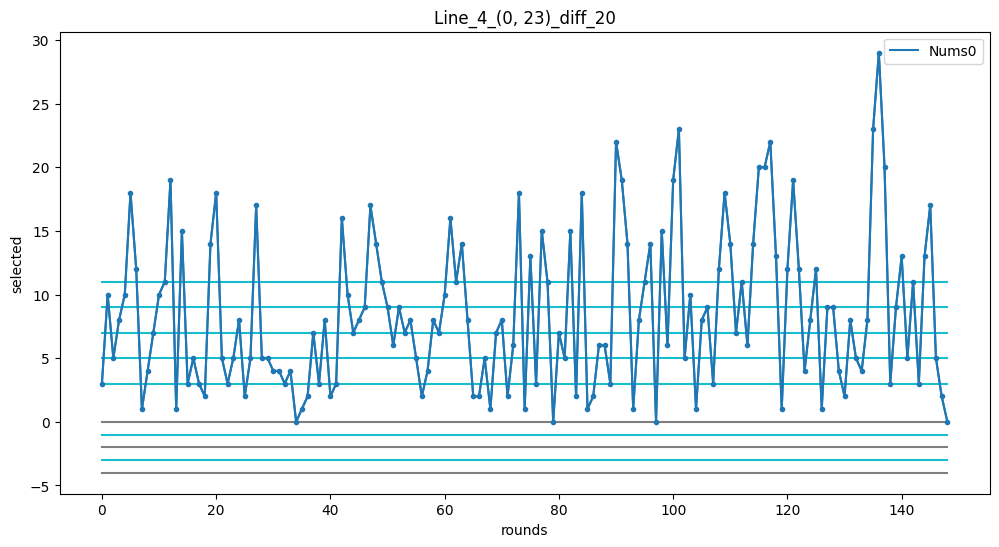

Runtime error near line 1: cannot commit - no transaction is active


In [60]:
Round = 4
############################
selected = Round - 1
ext_data = 23

before = candidate[selected-1]
after = candidate[selected+1]

print(f"before   = {before}")
print(f"ext_data = {ext_data}")
print(f"after    = {after}")

wanted_data_length = 30
helper_line_nums_1 = [10, 13, 15, 20, 25, 30, 35, 40, 45]
# helper_line_nums_2 = [-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 7, 9, 11]
helper_line_nums_2 = [-4, -3, -2, -1, 0, 3, 5, 7, 9, 11]
# lengths = [2, 5, 8, 10, 13, 15, 20, 25, 30]
lengths = [1, 10, 20]
start_pos_0 = 150
start_pos_1 = 250
num_data=row_list_none_last[selected]
show_after = False
show_before = False
show_average = True
min_max_last_num_length = 20
show_diff_nums = True

ext_datas = get_extdatas(show_before, show_after, before, ext_data, after)

get_information_v2(selected=selected,
                   last_results=row_list_none_last,
                   ext_datas=ext_datas,
                   wanted_data_length=wanted_data_length,
                   helper_line_nums_1=helper_line_nums_1,
                   helper_line_nums_2=helper_line_nums_2,
                   show_diff=True,
                   lengths=lengths,
                   start_pos_0=start_pos_0,
                   start_pos_1=start_pos_1,
                   show_after=show_after,
                   show_before=show_before,
                   show_average=show_average,
                   min_max_last_num_length=min_max_last_num_length,
                   show_diff_nums=show_diff_nums
                   )
candidate[selected] = ext_data
update_candidated(candidated={selected: ext_data}, version=version)

before   = 23
ext_data = 32
after    = 31


최소 값         = [12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
최대 값         = [12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
사용자 선택       = 32
마지막 값        = 27
마지막 값들       = [19, 21, 42, 33, 29, 37, 31, 26, 37, 28, 26, 37, 40, 27, 16, 32, 39, 27, 36, 35, 32, 37, 41, 25, 37, 38, 39, 34, 28, 33, 38, 38, 29, 39, 33, 39, 38, 12, 42, 30, 36, 32, 30, 19, 43, 40, 40, 33, 28, 27]
자주 나오는 값(부분) = [(17, 1), (44, 1), (23, 1), (20, 1), (25, 1), (12, 1), (24, 2), (43, 2), (16, 2), (19, 2), (29, 3), (41, 4), (31, 4), (26, 4), (21, 4), (22, 4), (27, 6), (35, 6), (42, 6), (30, 6), (39, 7), (36, 8), (32, 9), (38, 9), (28, 10), (40, 10), (37, 11), (34, 12), (33, 12)]
자주 나오는 값(전체) = [(13, 1), (15, 1), (12, 1), (20, 2), (17, 2), (16, 3), (18, 3), (19, 4), (23, 4), (44, 4), (25, 7), (21, 7), (26, 9), (22, 10), (24, 12), (43, 12), (31, 12), (41, 13), (30, 14), (29, 16),

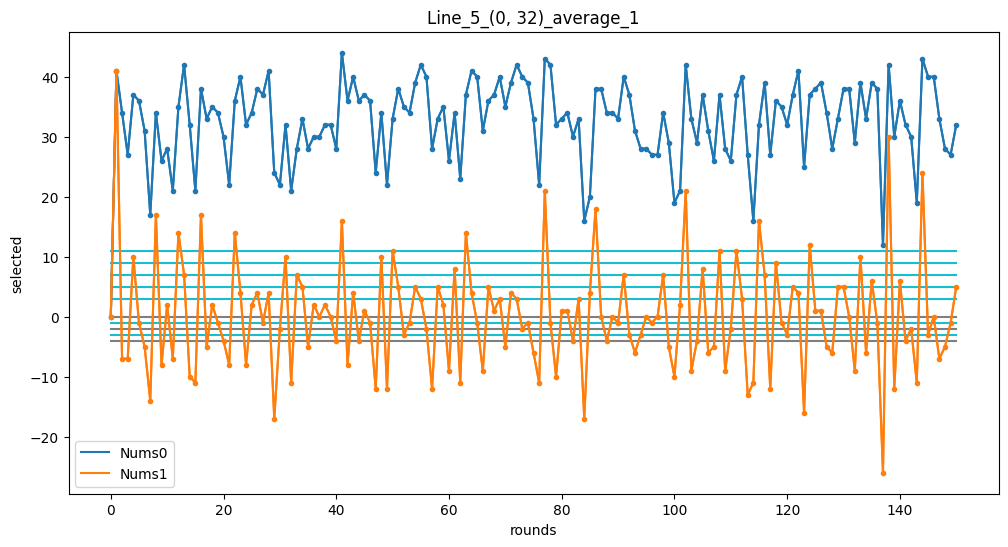

________________________________________
최소값          = [28.0, 28.1, 28.6, 28.7, 28.8, 28.9, 29.1, 29.2, 29.4, 29.6, 29.8, 30.0, 30.1, 30.2, 30.3, 30.4, 30.5, 30.6, 30.7, 30.8]
최대값          = [34.6, 34.7, 34.8, 34.9, 35.0, 35.1, 35.3, 35.4, 35.7, 35.9, 36.0, 36.3, 36.5, 36.7, 37.0, 37.2, 37.5, 37.8, 37.9, 38.1]
마지막          = [35.1, 33.9, 35.3, 34.9, 35.0, 34.9, 32.7, 34.1, 33.8, 33.6, 33.0, 33.1, 31.1, 32.1, 32.2, 32.4, 34.5, 33.1, 32.8, 32.4]


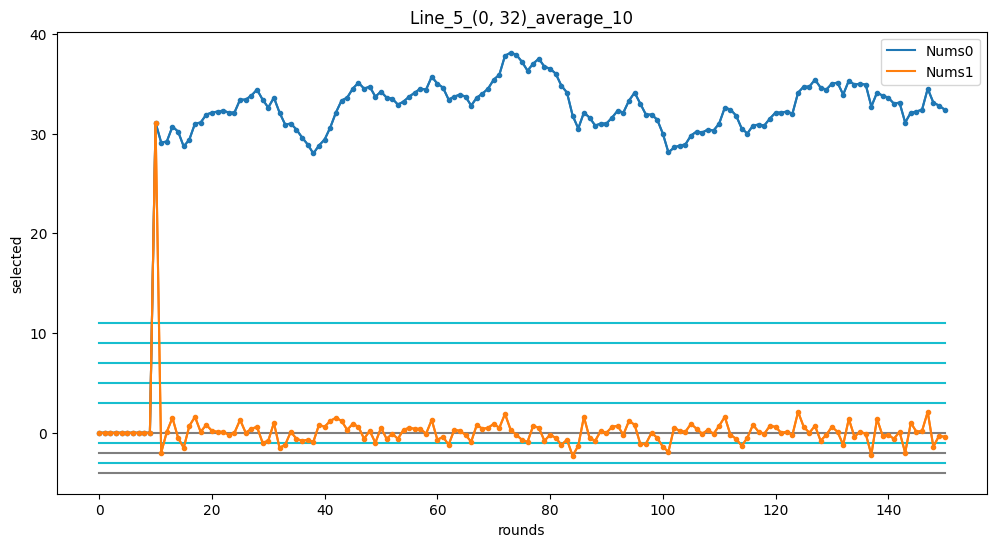

________________________________________
최소값          = [29.7, 29.85, 29.9, 30.3, 30.35, 30.45, 30.5, 30.6, 30.65, 30.75, 30.85, 30.9, 31.0, 31.05, 31.1, 31.15, 31.2, 31.25, 31.35, 31.4]
최대값          = [34.2, 34.3, 34.35, 34.5, 34.55, 34.6, 34.7, 34.8, 34.85, 35.1, 35.2, 35.25, 35.3, 35.45, 35.6, 35.75, 35.9, 35.95, 36.1, 36.3]
마지막          = [33.6, 33.05, 33.65, 34.5, 34.85, 34.8, 34.05, 34.35, 34.1, 34.3, 34.05, 33.5, 33.2, 33.5, 33.6, 33.65, 33.6, 33.6, 33.3, 33.0]


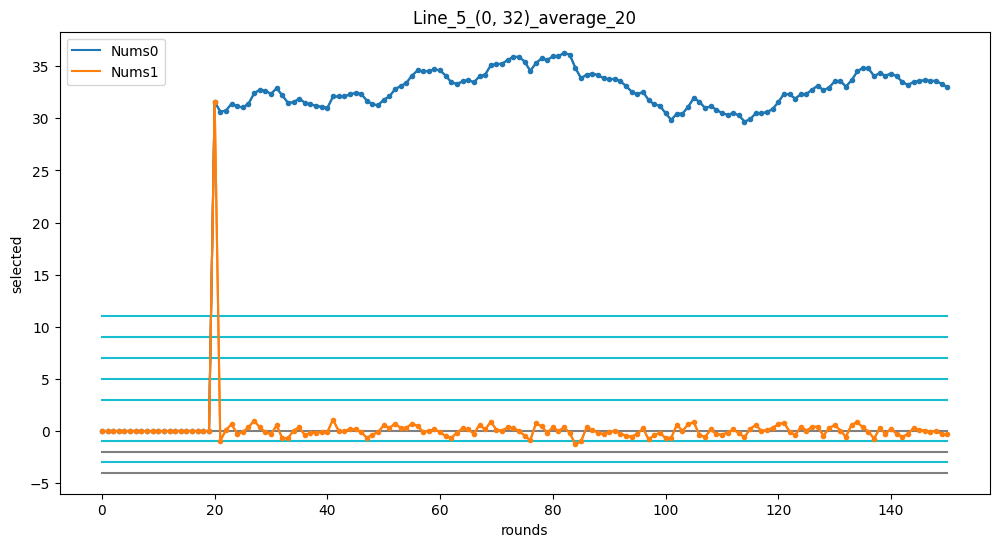

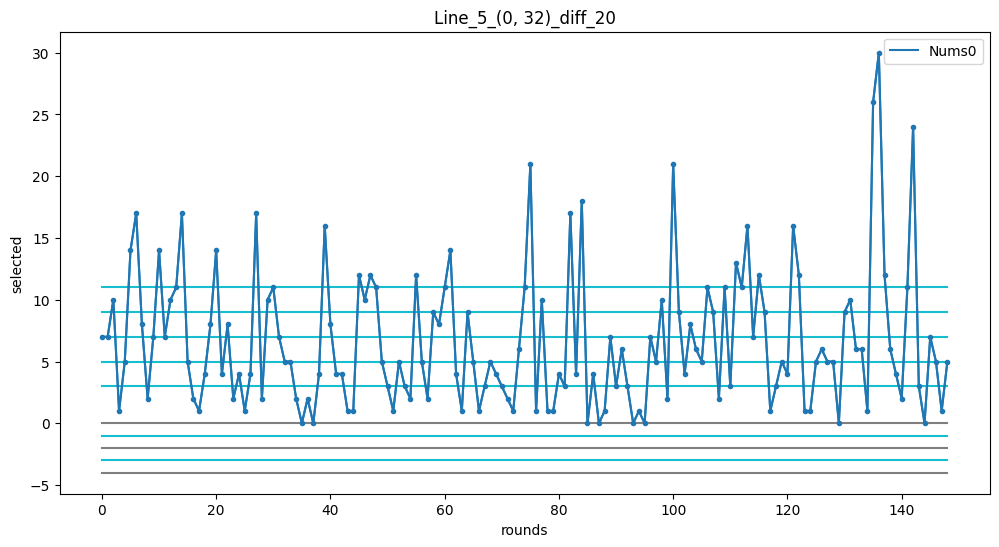

Runtime error near line 1: cannot commit - no transaction is active


In [61]:
Round = 5
############################
selected = Round - 1
ext_data = 32

before = candidate[selected-1]
after = candidate[selected+1]

print(f"before   = {before}")
print(f"ext_data = {ext_data}")
print(f"after    = {after}")

wanted_data_length = 50
helper_line_nums_1 = [10, 12, 15, 20, 25, 28, 30, 33, 35, 40, 45]
# helper_line_nums_2 = [-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 7, 9, 11]
helper_line_nums_2 = [-4, -3, -2, -1, 0, 3, 5, 7, 9, 11]
# lengths = [2, 5, 8, 10, 13, 15, 20, 25, 30]
lengths = [1, 10, 20]
start_pos_0 = 150
start_pos_1 = 250
num_data=row_list_none_last[selected]
show_after = False
show_before = False
show_average = True
min_max_last_num_length = 20
show_diff_nums = True

ext_datas = get_extdatas(show_before, show_after, before, ext_data, after)

get_information_v2(selected=selected,
                   last_results=row_list_none_last,
                   ext_datas=ext_datas,
                   wanted_data_length=wanted_data_length,
                   helper_line_nums_1=helper_line_nums_1,
                   helper_line_nums_2=helper_line_nums_2,
                   show_diff=True,
                   lengths=lengths,
                   start_pos_0=start_pos_0,
                   start_pos_1=start_pos_1,
                   show_after=show_after,
                   show_before=show_before,
                   show_average=show_average,
                   min_max_last_num_length=min_max_last_num_length,
                   show_diff_nums=show_diff_nums
                   )
candidate[selected] = ext_data
update_candidated(candidated={selected: ext_data}, version=version)

before   = 32
ext_data = 38
after    = 46


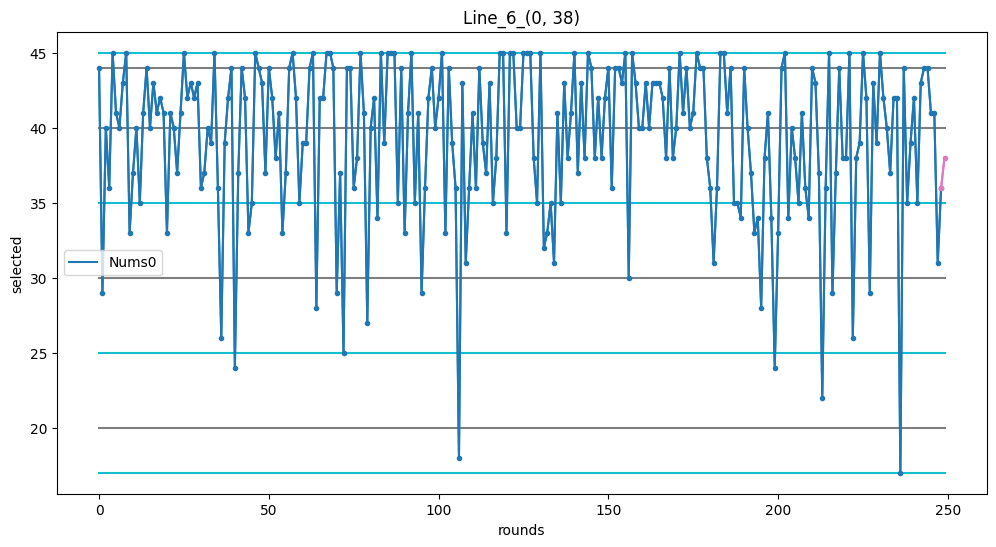

최소 값         = [17, 18, 22, 24, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
최대 값         = [17, 18, 22, 24, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
사용자 선택       = 38
마지막 값        = 36
마지막 값들       = [38, 38, 45, 26, 38, 39, 45, 42, 29, 43, 39, 45, 42, 40, 37, 42, 42, 17, 44, 35, 39, 42, 35, 43, 44, 44, 41, 41, 31, 36]
자주 나오는 값(부분) = [(18, 1), (32, 1), (30, 1), (28, 1), (24, 1), (22, 1), (26, 1), (17, 1), (29, 2), (31, 4), (33, 5), (39, 5), (34, 5), (37, 6), (42, 9), (36, 9), (35, 9), (41, 10), (40, 10), (43, 13), (38, 14), (44, 18), (45, 22)]
자주 나오는 값(전체) = [(19, 1), (23, 1), (27, 1), (18, 1), (22, 1), (17, 1), (25, 2), (26, 2), (24, 2), (30, 3), (28, 5), (32, 5), (29, 5), (31, 6), (34, 8), (33, 11), (37, 16), (35, 18), (40, 22), (36, 23), (39, 24), (41, 28), (38, 30), (42, 35), (43, 39), (44, 49), (45, 60)]
마지막 수의 앞과 뒤 #1 = [[42, 36, 43], [45, 36, 45], [43, 36, 32], [45, 36, 39], [44, 36, 40], [38, 36, 44], [43, 36, 4

________________________________________
최소값          = [34.2, 34.6, 35.3, 35.4, 35.5, 35.7, 35.8, 36.0, 36.1, 36.3, 36.4, 36.6, 36.7, 36.8, 36.9, 37.0, 37.1, 37.3, 37.4, 37.5]
최대값          = [40.2, 40.3, 40.4, 40.5, 40.6, 40.8, 40.9, 41.0, 41.1, 41.2, 41.3, 41.4, 41.5, 41.6, 41.7, 41.8, 42.1, 42.2, 42.3, 42.8]
마지막          = [39.1, 38.8, 40.2, 40.1, 40.4, 40.1, 37.6, 39.1, 38.3, 38.3, 38.0, 37.3, 37.6, 38.3, 38.5, 38.4, 40.8, 39.5, 39.6, 39.5]


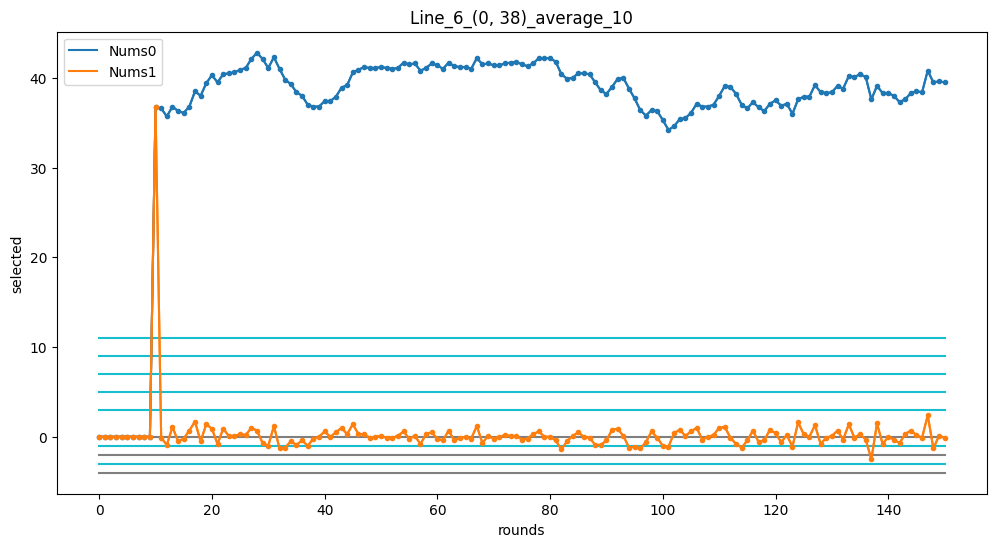

________________________________________
최소값          = [36.25, 36.3, 36.35, 36.55, 36.6, 36.65, 36.75, 36.8, 36.9, 37.05, 37.1, 37.15, 37.2, 37.25, 37.3, 37.35, 37.45, 37.6, 37.7, 37.75]
최대값          = [40.75, 40.8, 40.85, 40.9, 41.0, 41.05, 41.1, 41.15, 41.2, 41.25, 41.3, 41.35, 41.4, 41.45, 41.5, 41.6, 41.65, 41.8, 41.85, 41.9]
마지막          = [38.0, 37.95, 38.1, 38.85, 39.15, 39.0, 38.4, 38.75, 38.3, 38.35, 38.55, 38.05, 38.9, 39.2, 39.45, 39.25, 39.2, 39.3, 38.95, 38.9]


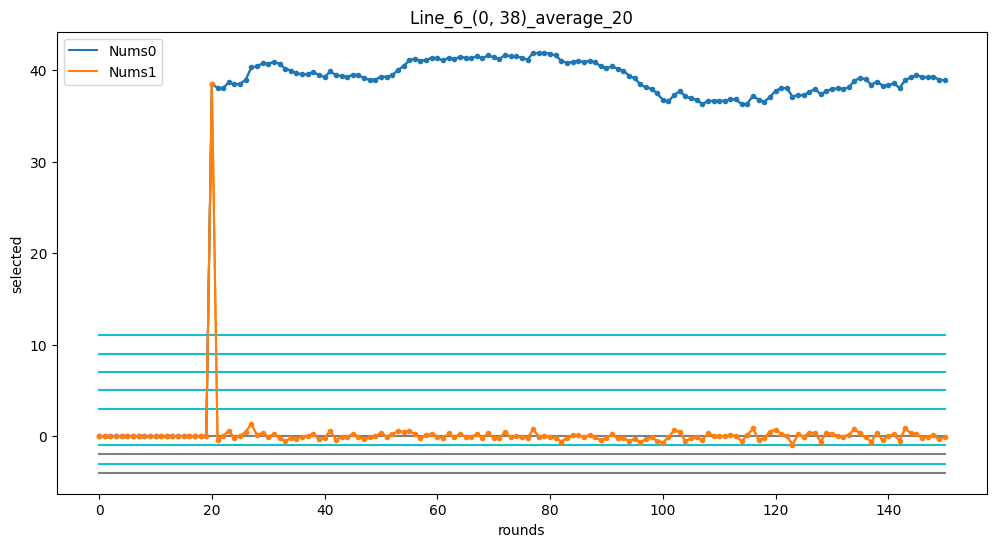

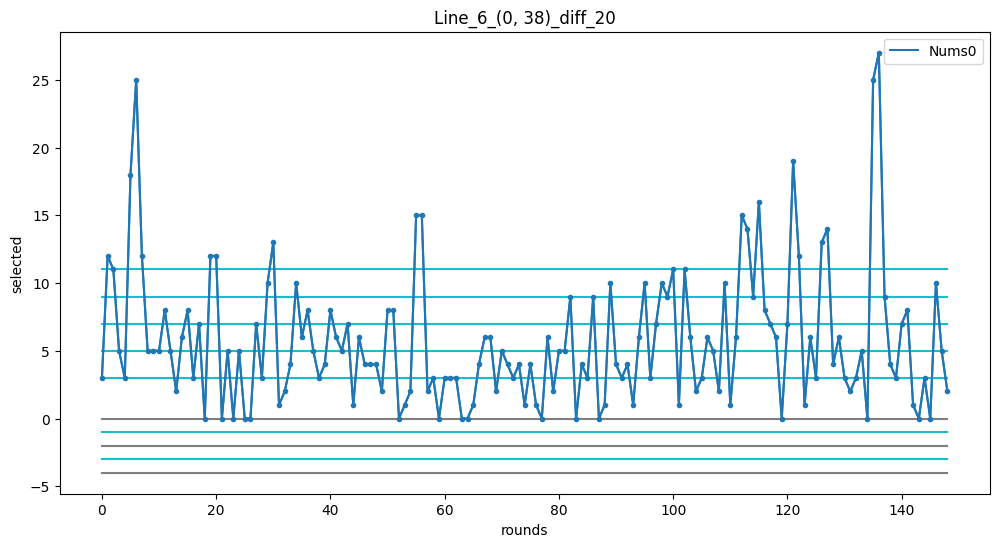

Runtime error near line 1: cannot commit - no transaction is active


In [62]:
Round = 6
############################
selected = Round - 1
ext_data = 38

before = candidate[selected-1]
after = 46

print(f"before   = {before}")
print(f"ext_data = {ext_data}")
print(f"after    = {after}")

wanted_data_length = 30
helper_line_nums_1 = [17, 20, 25, 30, 35, 40, 44, 45]
# helper_line_nums_2 = [-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 7, 9, 11]
helper_line_nums_2 = [-4, -3, -2, -1, 0, 3, 5, 7, 9, 11]
# lengths = [2, 5, 8, 10, 13, 15, 20, 25, 30]
lengths = [1, 10, 20]
start_pos_0 = 150
start_pos_1 = 250
num_data=row_list_none_last[selected]
show_after = False
show_before = False
show_average = True
min_max_last_num_length = 20
show_diff_nums = True

ext_datas = get_extdatas(show_before, show_after, before, ext_data, after)

get_information_v2(selected=selected,
                   last_results=row_list_none_last,
                   ext_datas=ext_datas,
                   wanted_data_length=wanted_data_length,
                   helper_line_nums_1=helper_line_nums_1,
                   helper_line_nums_2=helper_line_nums_2,
                   show_diff=True,
                   lengths=lengths,
                   start_pos_0=start_pos_0,
                   start_pos_1=start_pos_1,
                   show_after=show_after,
                   show_before=show_before,
                   show_average=show_average,
                   min_max_last_num_length=min_max_last_num_length,
                   show_diff_nums=show_diff_nums
                   )
candidate[selected] = ext_data
update_candidated(candidated={selected: ext_data}, version=version)

In [63]:
print(candidate)

{0: 3, 1: 6, 2: 14, 3: 23, 4: 32, 5: 38}


In [18]:
candidates = [[1, 3, 21, 28, 33, 40]
              ]

lasts = [
    [1, 16, 22, 23, 34, 38],
    [8, 16, 18, 19, 30, 33],
    [6, 9, 16, 19, 32, 36]
    ]

reals = [[3, 16, 18, 24, 40, 44],
         [5, 6, 11, 27, 43, 44]]

In [117]:
def draw_nums(ext_datas, is_pre_data=False, fig_size=(15, 8)):
    show_cols = [0, 1, 2, 3, 4, 5]
    show_label = False
    show_cnt = 100
    start_pos = row_length - show_cnt
    show_data = []
    for i in range(6):
        end_pos = -1 if is_pre_data else len(row_list_none_last[i])
        show_data.append(row_list_none_last[i][start_pos:end_pos])
    print(ext_datas)
    draw_scatter(show_data, f'line num : {key}', True, True, show_cols, ext_datas, show_label, helper_line_nums=[10, 20, 30, 40], fig_size=fig_size)

print('current work', datetime.now())

current work 2025-08-01 13:54:48.611343


[(0, 1), (1, 3), (2, 21), (3, 28), (4, 33), (5, 40)]


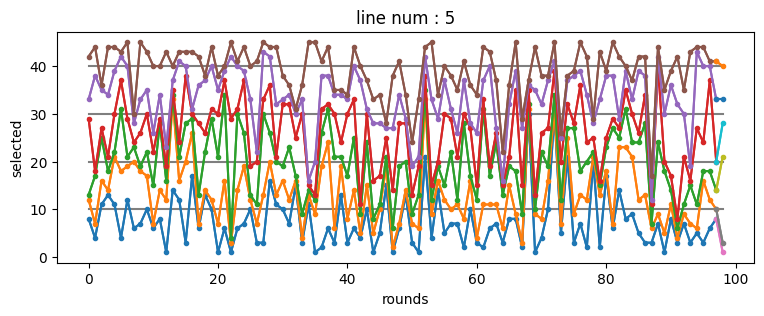

In [18]:
## My select 1180
ext_datas = [(i, candidates[0][i]) for i in range(len(candidates[0]))]
draw_nums(ext_datas=ext_datas, fig_size=(9, 3))

[(0, 1), (1, 3), (2, 21), (3, 28), (4, 33), (5, 40)]


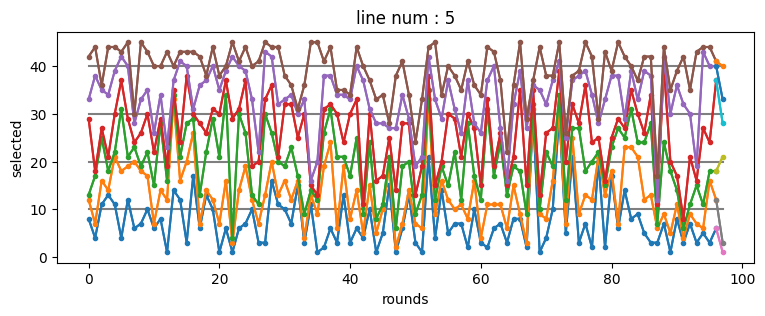

In [19]:
## My Select 1180 with 1178
ext_datas = [(i, candidates[0][i]) for i in range(len(candidates[0]))]
draw_nums(ext_datas, is_pre_data=True, fig_size=(9,3))

[(0, 8), (1, 16), (2, 18), (3, 19), (4, 30), (5, 33)]


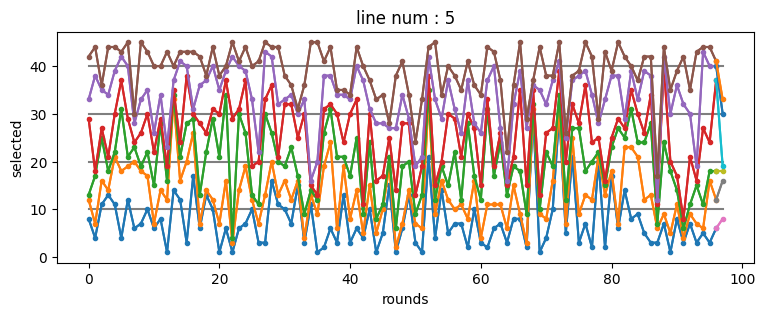

In [20]:
## My Select 1179_1 with 1178
cur_select = 1
ext_datas = [(i, lasts[cur_select][i]) for i in range(len(lasts[cur_select]))]
draw_nums(ext_datas, is_pre_data=True, fig_size=(9,3))

[(0, 3), (1, 16), (2, 18), (3, 24), (4, 40), (5, 44)]


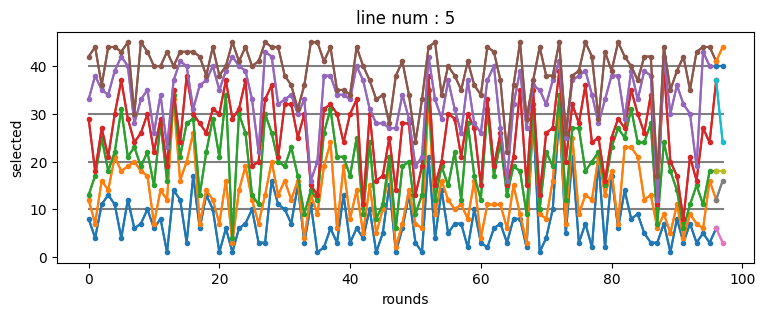

In [21]:
## real
cur_select = 0
ext_datas = [(i, reals[cur_select][i]) for i in range(len(reals[cur_select]))]
draw_nums(ext_datas, is_pre_data=True, fig_size=(9,3))

In [ ]:
print(sums)
datas = (
    ((1750505603, [[7, 10, 18, 23, 28, 39]]), 0.5),
    ((116885, [[7, 12, 24, 28, 34, 41]]), 76.246),
    ((115367, [[10, 13, 19, 23, 28, 40]]), 61.59),
    ((1750505748, [[6, 9, 20, 25, 31, 42]]), 575.33),
    ((115870, [[8, 11, 19, 26, 30, 43]]), 32.164),
    )
for data in datas:
    print(f'{data[0][1][0]}')
    print(f'sum = {sum(data[0][1][0])}')

In [113]:
print(sums[-20:])
datas = (
    ((115367, [[10, 13, 19, 23, 28, 40]]), 61.59),
    ((116885, [[7, 12, 24, 28, 34, 41]]), 76.246),
    ((114225, [[10, 13, 20, 24, 30, 40]]), 202.36),
    ((11114613, [[8, 12, 21, 26, 31, 39]]), 77.591),
    ((31116739, [[6, 9, 21, 28, 32, 42]]), 730.62006),
    ((114106, [[9, 12, 21, 26, 30, 40]]), 393.44),
    ((31116775, [[8, 13, 21, 27, 34, 41]]), 302.73),
)
for data in datas:
    print(f'{data[0][1][0]}')
    print(f'sum = {sum(data[0][1][0])}')
l1=[[12,21,26,28, 34, 39],
    [13, 20, 24, 30, 40,42]
   ]
for i in l1:
    print(i)
    print(f'sum = {sum(i)}')
last = [3, 7, 15, 16, 19, 43]
print(f'{"*"*20}\nlast : \n{last}\nsum = {sum(last)}')


[144, 158, 134, 145, 122, 160, 152, 160, 176, 154, 148, 158, 56, 166, 109, 125, 95, 113, 103, 103]
[10, 13, 19, 23, 28, 40]
sum = 133
[7, 12, 24, 28, 34, 41]
sum = 146
[10, 13, 20, 24, 30, 40]
sum = 137
[8, 12, 21, 26, 31, 39]
sum = 137
[6, 9, 21, 28, 32, 42]
sum = 138
[9, 12, 21, 26, 30, 40]
sum = 138
[8, 13, 21, 27, 34, 41]
sum = 144
[12, 21, 26, 28, 34, 39]
sum = 160
[13, 20, 24, 30, 40, 42]
sum = 169
********************
last : 
[3, 7, 15, 16, 19, 43]
sum = 103


[144, 158, 134, 145, 122, 160, 152, 160, 176, 154, 148, 158, 56, 166, 109, 125, 95, 113, 103, 138]


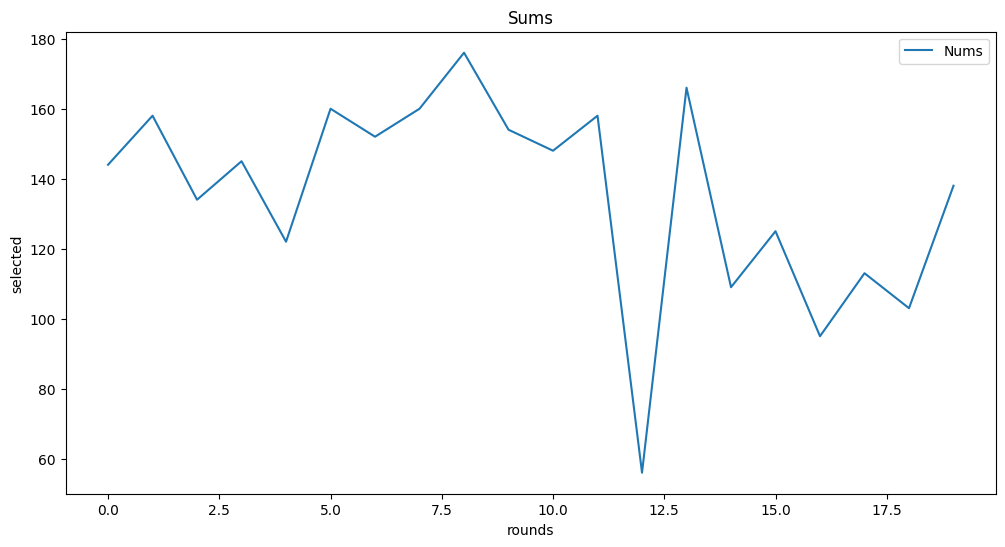

In [115]:
draw_graph(sums[-20:-1]+[138], f'Sums')

In [ ]:
l1=[[12,21,26,28, 34, 39],
    [13, 20, 24, 30, 40,42]]
for i in l1:
    print(sum(i))